# Wine Quality Prediction
**By: `Suraj Honkamble`**
### Bharat Intern Machine Learning Task-2

### Import basic required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [3]:
df=pd.read_csv('data/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Data understanding

In [10]:
df.shape

(1143, 13)

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### Statistical Info

In [16]:
df.describe(percentiles=[0.25,0.50,0.75,0.95]).T

,count,mean,std,min,25%,50%,75%,95%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,11.900,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,0.840,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,0.619,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,5.195,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.123,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,35.000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,112.000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.000,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,3.570,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,0.930,2.00000


### Missing values

In [17]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

#### No missing values.

### Duplicate rows

In [18]:
df.duplicated().sum()

0

#### No duplicate rows.

### Exploratory Data Analysis

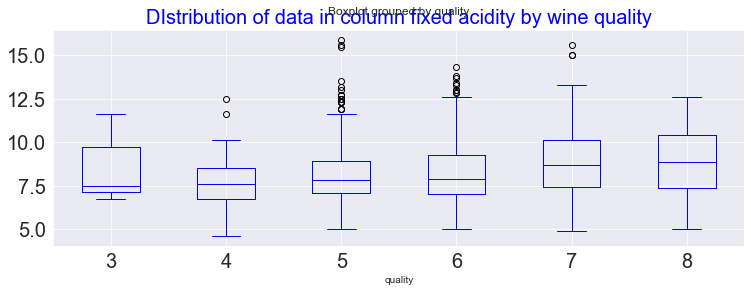

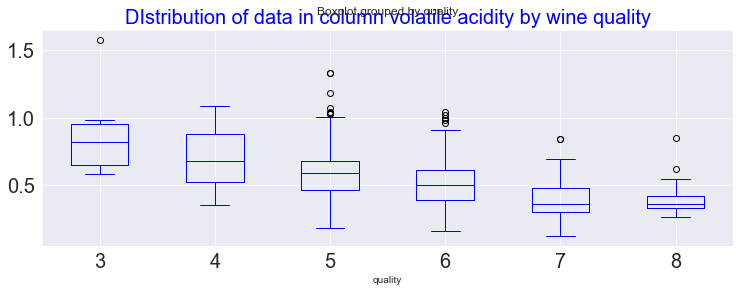

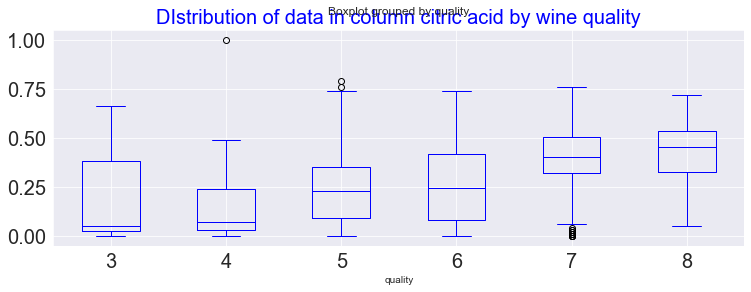

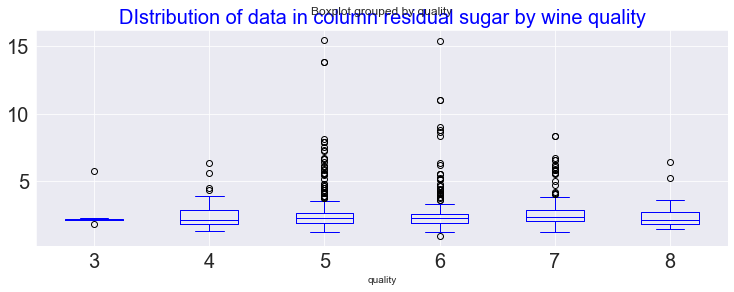

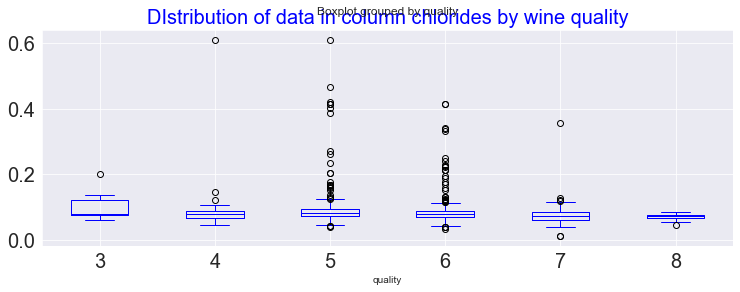

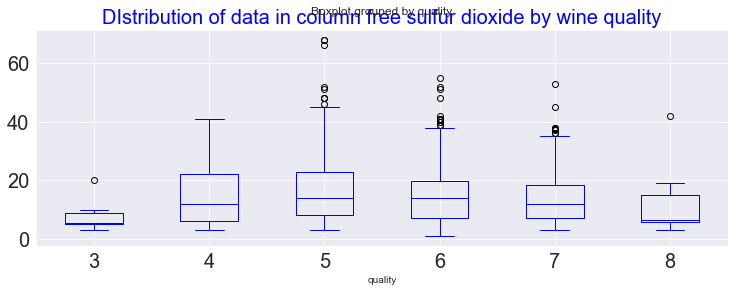

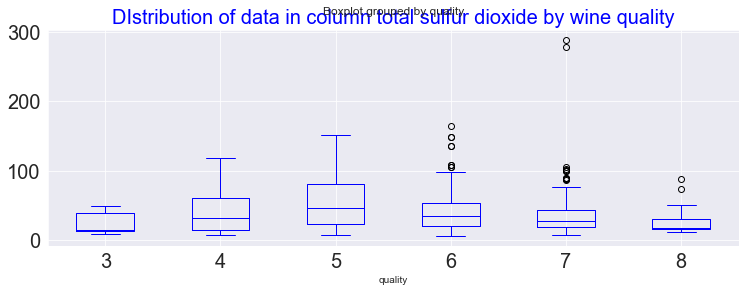

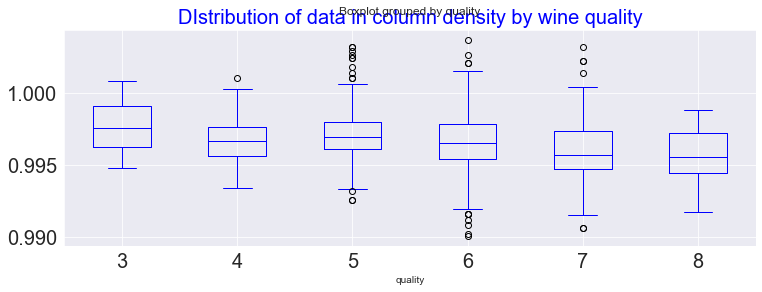

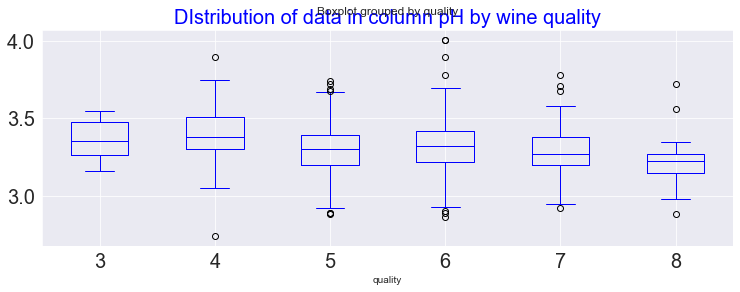

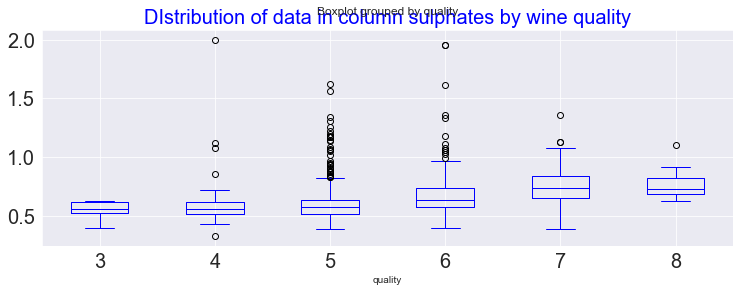

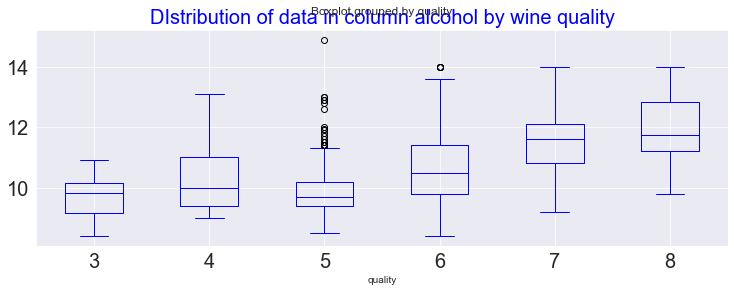

In [43]:
features=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 
          'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']

for col in features:
    df.boxplot(column=col, by='quality', figsize=(12,4), fontsize=20, color='blue',)
    plt.title("DIstribution of data in column {} by wine quality".format(col), fontsize=20, color='blue');
plt.show()

### Infference:
1. **As the quality of wine increases the alcohol percentage in the wine increases.**
2. **In high quality wine Sulphate quality is more.**
3. **High quality wine has low PH.**
4. **High quality wine has comparitevly low density.**
5. **Almost all quality wines has equal amount of sulphur dioxide.**
6. **High quality wines has low chloride level.**
7. **All quality wines has same amount of sugar residuals.**
8. **High quality wine has more amount of citric acid.**
9. **Volatile acidity is low in high quality wine.**
10. **Almost all quality wines has fixed acidity level.**

## We can use this dataset for both Classification and Regression problem, As per requirement I using regression models to predict wine quality.

### Correlation matrix

In [4]:
df.drop('Id', axis=1, inplace=True)

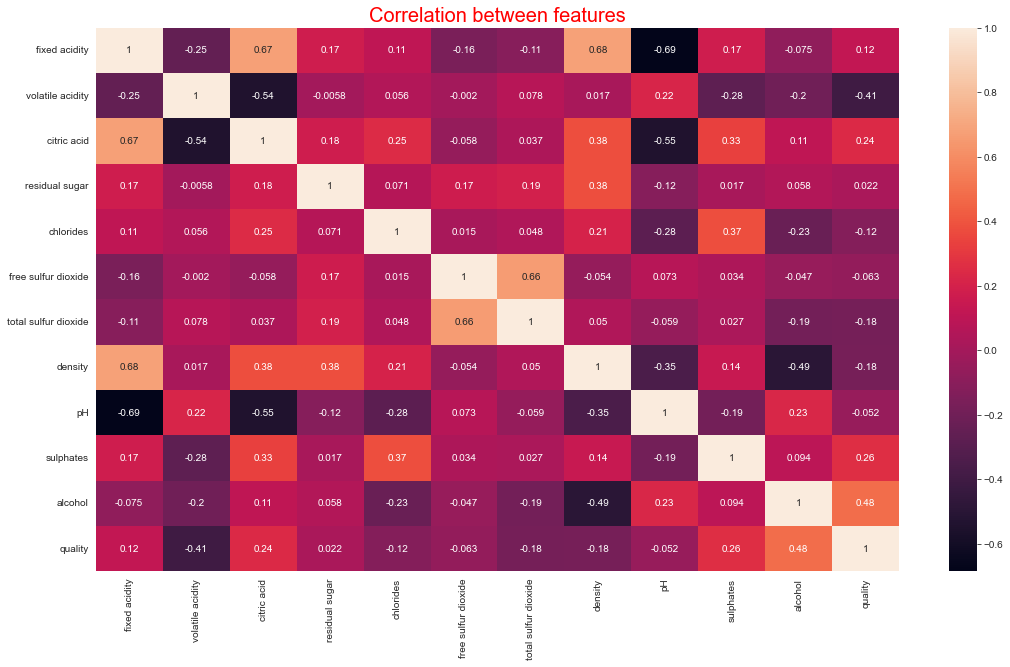

In [48]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True);
plt.title("Correlation between features", fontsize=20, color='red');

#### Low correlationship between features and target.

### Divide data into input and output

In [5]:
X=df.drop('quality', axis=1)
y=df['quality']

### Split into training and testing set

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, y, test_size=0.2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(914, 11) (229, 11) (914,) (229,)


### Scale the data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_tf=scaler.transform(x_train)
x_test_tf=scaler.transform(x_test)
x_train_tf[:5]

array([[ 0.55182184,  0.4453129 , -0.07248508,  0.61852643,  0.04516566,
         0.90203984,  1.22208144,  1.55345141, -0.43608681, -0.22349481,
        -0.68378737],
       [-1.00024784,  0.2215548 , -1.29090093, -0.31900783,  0.53474593,
        -0.93752611, -0.91433064, -0.12101614,  0.44392688,  0.18388974,
        -0.87344396],
       [ 1.87395527, -0.33784046,  0.84132681, -0.67959793,  1.16140868,
         1.96705171,  0.13883024,  0.82837045,  0.44392688,  1.17325222,
        -0.49413079],
       [-0.54037534,  0.4453129 , -1.34166826, -0.39112585, -0.26816572,
        -0.25979129, -0.2523438 ,  0.36932638,  1.07250809, -0.04890143,
        -0.58895908],
       [ 0.37936965, -0.33784046,  0.18135156,  0.11370029, -0.07233361,
         0.80522058,  2.36551326,  0.84923609,  0.00392004, -0.2816926 ,
        -0.96827225]])

### Model Building: Linear Regression

In [52]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_tf,y_train)

LinearRegression()

### Make prediction

In [56]:
y_pred=lr.predict(x_test_tf)
y_pred[:10]

array([5.77106651, 5.36864846, 5.60888878, 5.23971722, 5.32723446,
       5.05009523, 5.3226769 , 5.61365275, 5.62992197, 6.36754368])

### Model Evaluation

In [58]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("R2 Score", r2)
print("RMSE", rmse)

R2 Score 0.3512588199717386
RMSE 0.6306926278894504


### Model building: XGBoost

In [60]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train_tf, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

### Make Prediction

In [61]:
y_pred=xgb.predict(x_test_tf)
y_pred[:10]

array([5.993423 , 5.8661723, 6.17303  , 5.6400003, 5.462348 , 5.1307526,
       5.5447564, 6.0056214, 5.982844 , 6.416529 ], dtype=float32)

### Evaluation of model

In [62]:
from sklearn.metrics import r2_score, mean_squared_error
r2=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("R2 Score", r2)
print("RMSE", rmse)

R2 Score 0.37535363727926463
RMSE 0.6188695703817535


## Trying Classification models

In [63]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

#### Class imbalance in this dataset

### Using SMOTE to balancing the dataset

In [10]:
from imblearn.over_sampling import BorderlineSMOTE
X_resampled, y_resampled=BorderlineSMOTE().fit_resample(X, y)
print(X_resampled.shape, y_resampled.shape)

(2421, 11) (2421,)


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X_resampled, y_resampled, test_size=0.2)

### Scale the data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train_tf=scaler.transform(x_train)
x_test_tf=scaler.transform(x_test)
x_train[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1316,6.271739,0.687174,0.078354,2.673168,0.074061,16.597517,63.089441,0.996672,3.756708,0.636422,11.523789
22,6.700000,0.675000,0.070000,2.400000,0.089000,17.000000,82.000000,0.995800,3.350000,0.540000,10.100000
1890,8.806911,0.217743,0.417419,2.498166,0.069415,10.000000,20.069112,0.995129,3.358801,0.746037,11.946544
2220,9.765353,0.413422,0.466578,2.566620,0.072003,6.001407,16.333802,0.995581,3.166690,0.673366,11.700985
227,9.800000,0.660000,0.390000,3.200000,0.083000,21.000000,59.000000,0.998900,3.370000,0.710000,11.500000


### Model building: Random FOrest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_tf, y_train)

RandomForestClassifier()

### Make Prediction

In [24]:
y_pred=rf.predict(x_test_tf)
y_pred[:10]

array([7, 7, 6, 5, 5, 8, 6, 7, 6, 8], dtype=int64)

### Model Evaluation

In [28]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("Model Evaluation: Random Forest Classifier")
accuracy=accuracy_score(y_test, y_pred)
print("Accuracy", accuracy)
print("+-+-"*10)
print(confusion_matrix(y_test, y_pred))
print("+-+-"*10)
print(classification_report(y_test, y_pred))

Model Evaluation: Random Forest Classifier
Accuracy 0.8350515463917526
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
[[ 86   3   3   0   0]
 [  3  66  21   3   0]
 [  2  18  57  22   1]
 [  0   1   3  95   0]
 [  0   0   0   0 101]]
+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-
              precision    recall  f1-score   support

           4       0.95      0.93      0.94        92
           5       0.75      0.71      0.73        93
           6       0.68      0.57      0.62       100
           7       0.79      0.96      0.87        99
           8       0.99      1.00      1.00       101

    accuracy                           0.84       485
   macro avg       0.83      0.83      0.83       485
weighted avg       0.83      0.84      0.83       485



## Summary:
### 1. When used as regression problem the RMSE score is very low but the r2 score is not near to 1.
### 2. When used as classification problem the Accuracy is 84%.